## CHATBOT WITH NLP USING NEURAL NETWORK

The ability of a system (the chatbot in this case) to learn from the inputs it experiences is what is meant by the term "machine learning." One method they use to accomplish this is called natural language processing (NLP), and it describes any time a computer interacts with human language.
However, NLP is just the beginning. Conversational AI, or a chatbot, must possess the following three core abilities in order to be considered truly intelligent: 
1. Give a detailed response. 
2. Don't lose track of what's being said. 
3. Pass for a human without a second look.

This task is aimed at creating a chatbot model that have the 3  main features listed above

In [1]:
pip install tflearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kyusvalent\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#IMPORTING RELEVANT LIBRARIES
import numpy as np
import tensorflow as tf
import tflearn
import random

#NLTK FOR CONTESTUALIXATION AND NATURAL LANGUAGE PROCESSING TASK
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import json
import pickle
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


## Datasets
The datasets used for the implementation and deployment of the simple conversational chatbot was obtained from kaggle dataset repository. The data is classified into text, intent and responses as shown in figure 1. The data format provided also ensures that the datasets has no missing details.



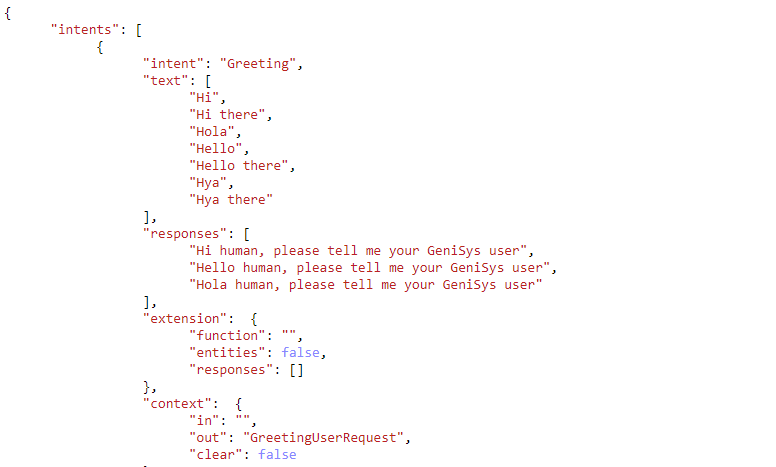

In [2]:
##Figure 1
from IPython.core.display import Image, display
display(Image('dtaset.png'))

In [3]:
#LOADIND THE INTENT JSONS DATASETS
print("Processing the Intents.....")
with open('intent.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [5]:
words = []
classes = []
documents = []
ignore_words = ['?']


#Looping through the Intents to Convert them to words, classes, documents and ignore_words
for intent in intents['intents']:
    for pattern in intent['text']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['intent']))
        # add to our classes list
        if intent['intent'] not in classes:
            classes.append(intent['intent'])

In [6]:
#TEXT PREPROCESSING OPERATIONS
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

143 documents
22 classes ['Clever', 'CourtesyGoodBye', 'CourtesyGreeting', 'CourtesyGreetingResponse', 'CurrentHumanQuery', 'GoodBye', 'Gossip', 'Greeting', 'GreetingResponse', 'Jokes', 'NameQuery', 'NotTalking2U', 'PodBayDoor', 'PodBayDoorResponse', 'RealNameQuery', 'SelfAware', 'Shutup', 'Swearing', 'Thanks', 'TimeQuery', 'UnderstandQuery', 'WhoAmI']
116 unique stemmed words ['!', "'s", ',', 'a', 'about', 'adam', 'adio', 'am', 'any', 'anyon', 'ar', 'aw', 'bay', 'be', 'bell', 'bor', 'by', 'bye', 'cal', 'camer', 'can', 'che', 'clev', 'commun', 'comprendo', 'conscy', 'could', 'do', 'doing', 'door', 'enough', 'for', 'friend', 'fuck', 'geny', 'get', 'girl', 'giv', 'good', 'goodby', 'gossip', 'got', 'gre', 'hav', 'hear', 'hello', 'help', 'hi', 'hol', 'hop', 'how', 'hya', 'i', 'ident', 'in', 'intellig', 'is', 'it', 'jok', 'know', 'lat', 'laugh', 'mak', 'me', 'mean', 'meant', 'mor', 'my', "n't", 'nam', 'nee', 'not', 'off', 'ok', 'op', 'pleas', 'pod', 'prov', 'quiet', 'real', 'say', 'see', 's

In [8]:
pickle.dump(words,open('texts.pkl','wb'))
pickle.dump(classes,open('labels.pkl','wb'))

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

## Training 
Although there are lot of Machine Learning model (such as naive bayes, support vector machine,etc.)that could be used for creating a chatbot model, but a neural network model will be used for This task owing to the fact that they have proven to be very effective and perfectly syncs well with the chatbot use case and the intent_json conversational data that will be used.
Therefore, for this task the datasets was used to train a neural network model using Stochastic Gradient Descent.
Stochastic gradient descent is an optimization algorithm for minimizing the loss of a predictive model with regard to a training dataset.

In [10]:
#Creating training data for the model
training = []
output = []
output_empty = [0] * len(classes)

for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [11]:
training[1][1]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
#Shuffling Randomly and Converting into Numpy Array for Faster Processing
random.shuffle(training)
training = np.array(training)

#Creating Train and Test Lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [13]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('model.h5', hist)
print("model created")


Train on 143 samples
Epoch 1/200
143/143 [==============================] - 2s 17ms/sample - loss: 3.0650 - acc: 0.0490
Epoch 2/200
143/143 [==============================] - 0s 559us/sample - loss: 2.9267 - acc: 0.1748
Epoch 3/200
143/143 [==============================] - 0s 533us/sample - loss: 2.8236 - acc: 0.2168
Epoch 4/200
143/143 [==============================] - 0s 573us/sample - loss: 2.5904 - acc: 0.2657
Epoch 5/200
143/143 [==============================] - 0s 559us/sample - loss: 2.3983 - acc: 0.3007
Epoch 6/200
143/143 [==============================] - 0s 615us/sample - loss: 2.2072 - acc: 0.3566
Epoch 7/200
143/143 [==============================] - 0s 727us/sample - loss: 2.0459 - acc: 0.4545
Epoch 8/200
143/143 [==============================] - 0s 727us/sample - loss: 1.8164 - acc: 0.4965
Epoch 9/200
143/143 [==============================] - 0s 503us/sample - loss: 1.7673 - acc: 0.5035
Epoch 10/200
143/143 [==============================] - 0s 671us/sample - loss: 

The model acheived an 100% accuracy with 143 iterations and a total loss of 0.00501 at 1000 epochs

In [14]:
from keras.models import load_model
model = load_model('model.h5')
import json
import random
intents = json.loads(open('intent.json').read())
words = pickle.load(open('texts.pkl','rb'))
classes = pickle.load(open('labels.pkl','rb'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Here, functions are defined to clean up sentence, predict classes and get response for user input

In [15]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))
def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['intent']== tag):
            result = random.choice(i['responses'])
            break
    return result
def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

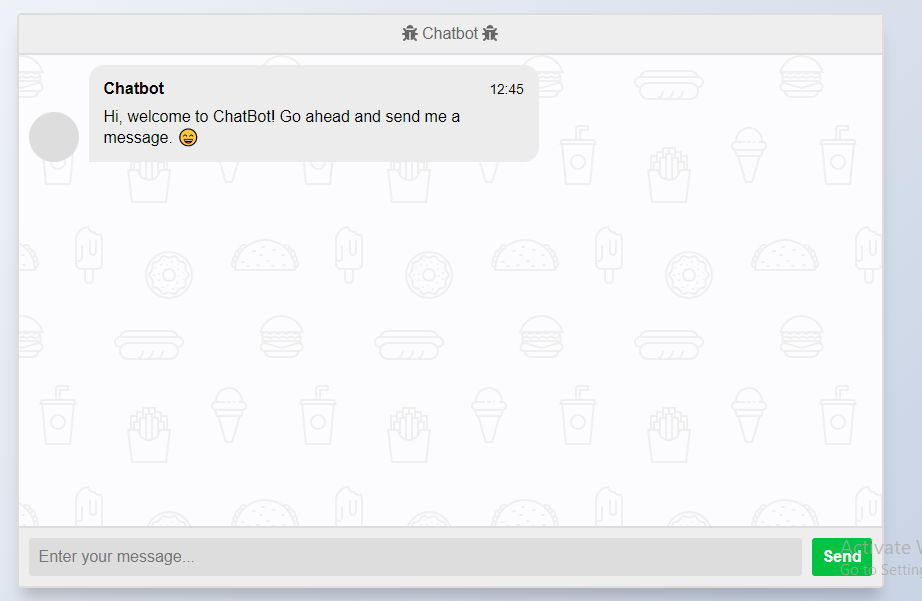

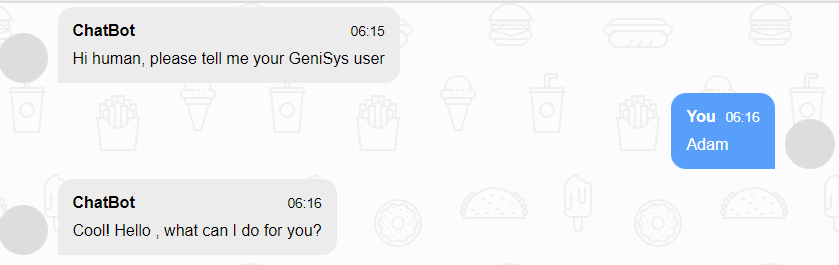

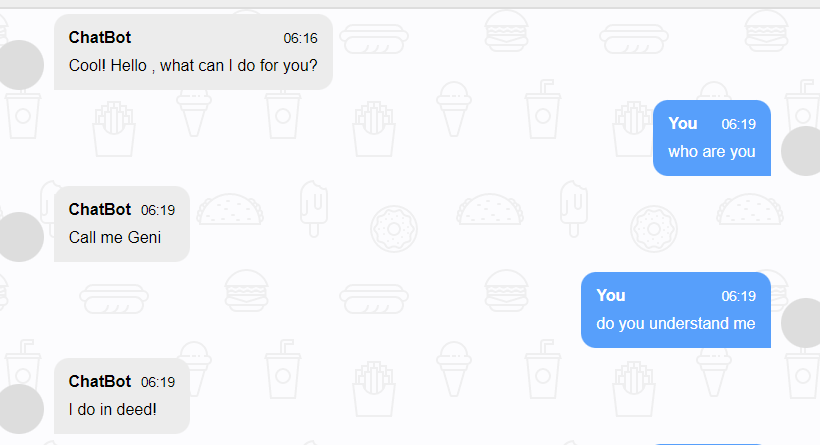

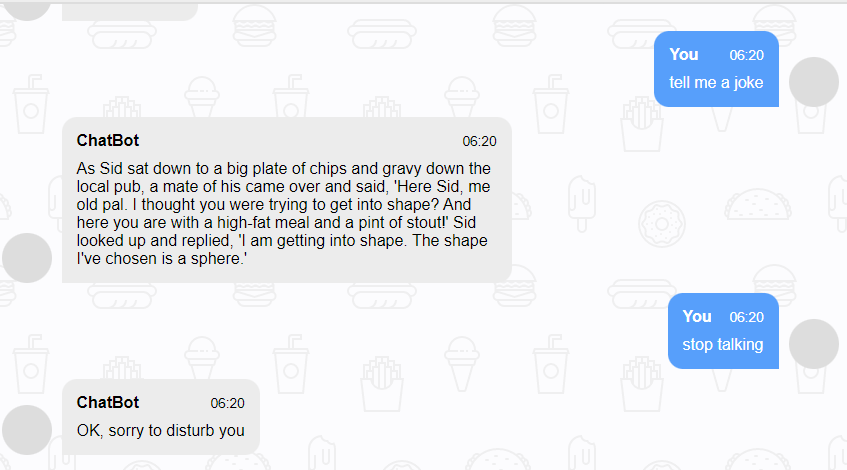

In [3]:
#Result of testing the model using flask python web framework
from IPython.core.display import Image, display
display(Image('defaultpage.png'))
display(Image('1.png'))
display(Image('2.png'))
display(Image('3.png'))

### The test result is indicative of the 100% model accuracy acheived, therefore the model can be generalized

#### OBSERVATIONS
The neural network model performed optimally and gave a high accuracy on training, which was further justified by testing the model. The implementation further revealed that a chatbot's effectiveness is dependent on the quality and quantity of data supplied during the training of the model. As a result, a chatbot is unable to perform effectively outside the confines of the data with which it is trained.